## Applied Algorithm HW 5

## Name: Shubham Bhagat  &nbsp;&nbsp;  Username: snbhagat
### Partner: Akhil Varma

#### All work here is solely mine.

###  Problem 1.1 : The brute-force pattern-matching algorithm

The brute force algorithm works by contsnatly comparing pattern to the text, until the characters that do not match are found. For a pattern p in a text d, algorithm compares p to the text d. So, the worst case scenario would be that the pattern matching in the last substring of text d and then the time complexity would be Ω(dp)

>One such example would be  
>D : ggggggggggggghh  
>P : gghh  

###  Problem 1.2 - Python’s str class and pattern-matching

- In this question, we try to incorporate python's str class' **count()** method.
- We basically calculate the number of Non-overlapping occurences of a given pattern in the given string.
- We run the three algorithms on a set of text and pattern combinations. 

In [5]:
#Problem 1.2.1
def find_brute(D, P):
    n, m = len(D), len(P)
    count = 0
    i = 0
    # every starting position
    while i < (n-m+1):
        k=0
    # conduct O(k) comparisons 
        while k < m and D[i+k] == P[k]:
            k += 1 
        if k==m:
            count+=1
            i = i + m
        else:
            i+=1
    return count

In [7]:
#Problem 1.2.2
def find_boyer_moore(T, P): 
    n, m = len(T), len(P)
    count = 0
    if m==0:
        return 0 
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1 
    while i<n:
        # If match , decrease i,k
        if T[i] == P[k]: 
            if k == 0:
                count+=1
                i = i+2*m-1
                k = m-1
                
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else: 
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m - 1
    return count

In [8]:
#Problem 1.2.3
def compute_kmp_fail(P):
    m = len(P) 
    fail=[0]*m
    j=1
    k=0 
    while j<m:
        if P[j] == P[k]: 
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1] 
        else:
            j +=1 
    return fail

def find_kmp(T, P):
    n, m = len(T), len(P) 
    count = 0
    if m==0:
        return 0
    fail = compute_kmp_fail(P)
    j=0
    k=0
    while j<n:
        if T[j] == P[k]:
            if k == m - 1:
                count += 1
                k = -1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return count

In [10]:
text_pattern ={"cdcdcdcdccdc" : "cdc", "dcsdcddcsd": "csd", "dcccddcddcdcdc": "ddc"}
for T, P in text_pattern.items():
    print("Text: ",T," Pattern: ",P)
    print("Brute force: ",find_brute(T,P))
    print("Boyer Moore: ",find_boyer_moore(T,P))
    print("KMP: ", find_kmp(T,P))
    print(" ")

Text:  cdcdcdcdccdc  Pattern:  cdc
Brute force:  3
Boyer Moore:  3
KMP:  3
 
Text:  dcsdcddcsd  Pattern:  csd
Brute force:  2
Boyer Moore:  2
KMP:  2
 
Text:  dcccddcddcdcdc  Pattern:  ddc
Brute force:  2
Boyer Moore:  2
KMP:  2
 


***

# Problem 2: Experimental Analysis of Pattern-Matching Algorithms

### Problem 2.1 - Character Comparisions

In [62]:
c1 = 0
def brute_force_comp(T, P):
    global c1
    n, m = len(T), len(P)
  
    for i in range(n-m+1):
        
        c1+=1
        
        k = 0
        
        while k < m and T[i+k] == P[k]:
            

            
            k += 1
            
            if k == m:
                return i
    return -1

c2=0
def boyer_moore_comp (T, P):
    global c2
    n, m = len(T), len(P)
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        
        c2+=1
        
        if T[i] == P[k]:
            
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return -1

c3=0
def compute_kmp_fail(P):
    global c3 
    
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        c3+=1
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail



def find_kmp_comp(T, P):
    
    global c3 
    
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    while j < n:
        c3+=1
        if T[j] == P[k]:
            
            
            
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1

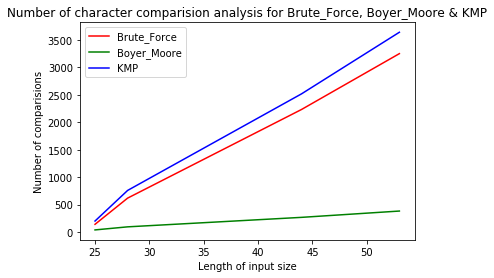

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import timeit


T = """Any solution to a nontrivial instance of the matrix-chain 
multiplication  problem  requires  us  to  split  the  product,  and 
that any optimal solution contains within it optimal solutions to 
subproblem instances. 
‣Build  an  optimal  solution  to  an  instance  of  the  matrix-chain 
multiplication problem by splitting the problem into two 
subproblems finding optimal solutions to subproblem 
instances, and then combining these optimal subproblem 
solutions. 
‣When  searching  for  the  correct  place  to  split  the  product,  we 
should consider all possible places and return the optimal one.
The  Huffman’s  algorithm  is  an  example  application  of  an 
algorithmic design pattern called the greedy method.  
• Use  short  code-word  strings  to  encode  high-frequency 
characters  and  long  code-word  strings  to  encode  low-
frequency characters. 
•  Huffman’s algorithm constructs an optimal prefix code for 
a    string  of  length  n  with  d  distinct  characters  in  O(n+d 
logd) time.
Text processing remains one of the dominant functions of 
computers. Computer are used to  edit, store, and display 
documents.  
• New data is being generated at a rapidly increasing pace. 
• Examples  of  digital  collections:  email  archives,  customer 
reviews,  documents  stored  locally  on  a  user’s  computer, 
snapshots  of  the  www,  social  media  data,  e.g.,  Twitter, 
Facebook etc. 
• These  collections  include  written  text  from  hundreds  of 
international languages.  
• Furthermore, there are large data sets (such as DNA) that 
can  be  viewed  computationally  as  “strings”  even  though 
they are not language. """
p = ["optimal solution contains","searching  for  the  correct","combining these optimal subproblem solutions","Text processing remains one of the dominant functions"]


a_bf = []
b_bf = []
a_bm = []
b_bm = []
a_kmp = []
b_kmp = []


for i in p: 
    
    brute_force_comp(T,i)
    a_bf.append(len(i))
    b_bf.append(c1)
    
    boyer_moore_comp(T,i)
    a_bm.append(len(i))
    b_bm.append(c2)
    
    find_kmp_comp(T,i)
    a_kmp.append(len(i))
    b_kmp.append(c3)
    
    

plt.plot(a_bf, b_bf, color="red", label="Brute_Force")
plt.plot(a_bm, b_bm, color="green", label="Boyer_Moore")
plt.plot(a_kmp, b_kmp, color="blue", label="KMP")
plt.xlabel('Length of input size')
plt.ylabel('Number of comparisions')
plt.title("Number of character comparision analysis for Brute_Force, Boyer_Moore & KMP")
plt.legend(loc='best')
plt.show()


### Problem 2.2 - Relative Speed comparison:

In [64]:
def brute_force(T, P):
    n, m = len(T), len(P)
    for i in range(n-m+1):
        k = 0
        while k < m and T[i+k] == P[k]:
            k += 1
            if k == m:
                return i
    return -1

def boyer_moore(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        if T[i] == P[k]:
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return -1

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail


def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1

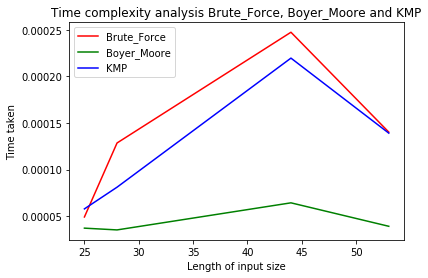

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import timeit


T = """Any solution to a nontrivial instance of the matrix-chain 
multiplication  problem  requires  us  to  split  the  product,  and 
that any optimal solution contains within it optimal solutions to 
subproblem instances. 
‣Build  an  optimal  solution  to  an  instance  of  the  matrix-chain 
multiplication problem by splitting the problem into two 
subproblems finding optimal solutions to subproblem 
instances, and then combining these optimal subproblem 
solutions. 
‣When  searching  for  the  correct  place  to  split  the  product,  we 
should consider all possible places and return the optimal one.
The  Huffman’s  algorithm  is  an  example  application  of  an 
algorithmic design pattern called the greedy method.  
• Use  short  code-word  strings  to  encode  high-frequency 
characters  and  long  code-word  strings  to  encode  low-
frequency characters. 
•  Huffman’s algorithm constructs an optimal prefix code for 
a    string  of  length  n  with  d  distinct  characters  in  O(n+d 
logd) time.
Text processing remains one of the dominant functions of 
computers. Computer are used to  edit, store, and display 
documents.  
• New data is being generated at a rapidly increasing pace. 
• Examples  of  digital  collections:  email  archives,  customer 
reviews,  documents  stored  locally  on  a  user’s  computer, 
snapshots  of  the  www,  social  media  data,  e.g.,  Twitter, 
Facebook etc. 
• These  collections  include  written  text  from  hundreds  of 
international languages.  
• Furthermore, there are large data sets (such as DNA) that 
can  be  viewed  computationally  as  “strings”  even  though 
they are not language. """
p = ["optimal solution contains","searching  for  the  correct","combining these optimal subproblem solutions","Text processing remains one of the dominant functions"]


a_bf = []
b_bf = []
a_bm = []
b_bm = []
a_kmp = []
b_kmp = []



for i in p:
    
    start1 = timeit.default_timer()
    brute_force(T,i)
    stop1 = timeit.default_timer()
    a_bf.append(len(i))
    b_bf.append(stop1 - start1)
    
    start2 = timeit.default_timer()
    boyer_moore(T,i)
    stop2 = timeit.default_timer()
    a_bm.append(len(i))
    b_bm.append(stop2 - start2)
    
    start3 = timeit.default_timer()
    find_kmp(T,i)
    stop3 = timeit.default_timer()
    a_kmp.append(len(i))
    b_kmp.append(stop3 - start3)
    


plt.plot(a_bf, b_bf, color="red", label="Brute_Force")
plt.plot(a_bm, b_bm, color="green", label="Boyer_Moore")
plt.plot(a_kmp, b_kmp, color="blue", label="KMP")
plt.xlabel('Length of input size')
plt.ylabel('Time taken')
plt.title("Time complexity analysis Brute_Force, Boyer_Moore and KMP")
plt.legend(loc='best')
plt.show()
 

***

# Problem 3: Matrix-chain Multiplication

- In this problem, we solve the Matrix_chain Multiplication problem in 3 ways.
    - The Brute Force
    - Bottom-Up Dynamic Approach
    - Dynamic Programming with Memoization
    
    
- **The Brute Force:**
    - In this particular approach, we try to parenthesize the matrices in all possible combinations, find out the  total number of multiplications for each parentheiszation and then output the one with the least number of parenthesization.
    - This Approach takes exponential time as it basically calculates a few intermediate parenthesization multiple times.
    - Hence, for a chain of 4 matrices it performs 26 multiplications as seen from the below tree
    - For large number of matrices, this algo would run in exponential time.


- **Bottom-Up Dynamic Approach:**
    - The Bottom up Dynamic approach makes use of a Memoization table. 
    - The Memoization table helps in decreasing the number of matrix multiplications by storing the intermediate results that were getting calculated multiple times in the brute force approach. 
    - Storing these calculations helps decrease a lot of redundant multiplications and essentially, decreasing the running time of solving the MCM problem.
    - The computations performed in a shaded subtree are replaced by a single memo table lookup.
    - This is an iterative approach to solve the MCM problem as opposed to the brute force which is a recursive approach.


- **Dynamic Programming with Memoization:**
    - The Dynamic Programming with Memoization approach basically combines Brute force and Dynamic Programming.
    - It uses Memoization concept along with the brute force algorithm, hence essentially helping in reducing the number of unwanted multiplications.

## 1. The Brute Force:

In [11]:
def brute_mcm(p,i,j):
    if i == j:
        return 0
    m = [[0 for k in range(j+1)] for l in range(i+1)]
    m[i][j] = 100000
    for k in range(i,j):
        q = brute_mcm(p,i,k) + brute_mcm(p,k+1,j) + p[i-1]*p[j]*p[k]
        if q<m[i][j]:
            m[i][j] = q
    return m[i][j]

if __name__ == "__main__":
    N = int(input("Enter number of matrices: "))
    P_string = input("Enter row, col for each matrix:")
    k=0
    P=[0]*(N+1)
    P_list = P_string.split()
    for i in range(0,len(P_list),2):
        P[k] = int(P_list[i])
        k+=1
    P[-1] = int(P_list[-1])
    matmulans = brute_mcm(P,1,N)
    print("The smallest number of multiplications required are:",matmulans)

Enter number of matrices: 4
Enter row, col for each matrix:2 4 4 3 3 2 2 4
The smallest number of multiplications required are: 52


## 2. Bottom-up Dynamic Programming

In [12]:
def print_op(s,i,j,str_list,k):
    if i == j:
        str_list.append("A"+str(k))
        k+=1
    else:
        str_list.append("(")
        str_list,k = print_op(s,i,s[i][j],str_list,k)
        str_list,k = print_op(s,s[i][j]+1,j,str_list,k)
        str_list.append(")")
    return str_list,k

def mat_chain_mul(N,P1):
    m = [[0 for i in range(N)] for j in range(N)]
    s = [[0 for i in range(N)] for j in range(N)]
    val = 0
    k=0
    P = [0]*N
    for i in range(0,len(P1),2):
        P[k] = P1[i]
        k+=1
    P[-1] = P1[-1]
    for diag in range(1, N-1):
        for i in range(1, N-diag):
            j = i+diag
            min = 10000000
            if diag == 1:
                m[i][j] = P[i-1]*P[i]*P[j]
                s[i][j] = i
            else:
                for k in range(i, j):
                    val = m[i][k] + m[k+1][j] + P[i-1]*P[k]*P[j]
                    if val<min:
                        min = val
                        s[i][j] = k 
                m[i][j] = min
    ans_list,k = print_op(s,1,N-1,[],1)
    print("Least number of multiplications required:",m[1][N-1],''.join(ans_list))
#     for row in m:
#         print(*row)
#     print("")

if __name__ == "__main__":
    N = int(input("Enter number of matrices: "))
    P_string = input("Enter row, col for each matrix:")
    P_list = P_string.split()
    for i in range(len(P_list)):
        P_list[i] = int(P_list[i])
    mat_chain_mul(N+1, P_list)

Enter number of matrices: 4
Enter row, col for each matrix:2 4 4 3 3 2 2 4
Least number of multiplications required: 52 (((A1A2)A3)A4)


## 3. Dynamic Programming with Memoization

In [13]:
def memo_mat_chain(P):
    N = len(P)-1
    m = [[100000 for i in range(N+1)] for j in range(N+1)]
    return look_chain(m,P,1,N)

def look_chain(m,P,i,j):
    if m[i][j]<100000:
        return m[i][j]
    if i == j:
        m[i][j] = 0
    else:
        for k in range(i,j):
            q = look_chain(m,P,i,k) + look_chain(m,P,k+1,j) + P[i-1]*P[j]*P[k]
            if q < m[i][j]:
                m[i][j] = q
    # for row in m:
    #     print(*row)
    # print("")
    return m[i][j]


if __name__ == "__main__":
    N = int(input("Enter number of matrices: "))
    P_string = input("Enter row, col for each matrix:")
    P_list = P_string.split()
    k=0
    P=[0]*(N+1)
    for i in range(0,len(P_list),2):
        P[k] = int(P_list[i])
        k+=1
    P[-1] = int(P_list[-1])
    matmulans = memo_mat_chain(P)
    print("The smallest number of multiplications required are:",matmulans)

Enter number of matrices: 4
Enter row, col for each matrix:2 4 4 3 3 2 2 4
The smallest number of multiplications required are: 52


***

# Problem 4: Longest Common Sub-sequence (LCS) Problem 

- The LCS problem is basically the Longest Common Subsequence problem wherein we try to find the longest common subsequence between two given strings.
- Similar to the MCM problem, the brute force implementation of this problem also takes exponential time for strings with comparitively large lengths.
- It basically forms a tree similar to the one in the Problem 3.
- To avoid this, just like in the MCM problem, we can make use of DYnamic Programming.
- The main idea here is to create a look up table using which we can calculate values before time and storing them so as to use them whenever needed instead of calculating them over and over again.
- Similar to the MCM problem, we create a memoization table.
- The ans_func() method is used to back track and get the final solution.

In [14]:
def ans_func(m,i,j,longcs,x,y):
    while i!= 0 and j!=0:
        if x[i] == y[j]:
            longcs += x[i]
            i-=1
            j-=1
        else:
            if m[i-1][j] >= m[i][j-1]:
                i-=1
            else:
                j-=1
    return longcs[::-1]

def lcs(st1,st2):
    len_st1 = len(st1)
    len_st2 = len(st2)
    longcs=""
    if len_st1 > len_st2:
        max1 = len_st1
        min1 = len_st2
    else:
        max1 = len_st2
        min1 = len_st1
    m = [[0 for i in range(max1+1)] for j in range(min1+1)]
    st3 = " " + st1
    st4 = " " + st2
    len_st1 = len(st3)
    len_st2 = len(st4)
    if len_st1 > len_st2:
        max1 = len_st1
        min1 = len_st2
    else:
        max1 = len_st2
        min1 = len_st1

    for i in range(1,min1):
        for j in range(1,max1):
            if max1 == len_st1:
                if st4[i] == st3[j]:
                    m[i][j] = 1 + m[i-1][j-1]
                else:
                    m[i][j] = max(m[i-1][j],m[i][j-1])
            elif max1 == len_st2:
                if st3[i] == st4[j]:
                    m[i][j] = 1 + m[i-1][j-1]
                else:
                    m[i][j] = max(m[i-1][j],m[i][j-1])     
    if max1 == len_st2:
        longcs = ans_func(m,min1-1,max1-1,longcs,st3,st4)
    elif max1 == len_st1:
        longcs = ans_func(m,min1-1,max1-1,longcs,st4,st3)
    print("Longest Common Subsequence of {} and {} is: {} ".format(st1,st2,longcs))

if __name__ == "__main__":
    # lcs("stone","longest")
    string1 = input("Enter string 1: ")
    string2 = input("Enter string 2: ")
    lcs(string1,string2)

Enter string 1: ACCGGTCGAGTGCGCGGAAGCCGGCCGAA
Enter string 2: GTCGTTCGGAATGCCGTTGCTCTGTAAA
Longest Common Subsequence of ACCGGTCGAGTGCGCGGAAGCCGGCCGAA and GTCGTTCGGAATGCCGTTGCTCTGTAAA is: GTCGTCGGAAGCCGGCCGAA 
